In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilsTopology import *
from utilsBaricentricNeuralNetwork import *
fontsize=16

## CPLF example, generated by two points (simple continuous linear function).

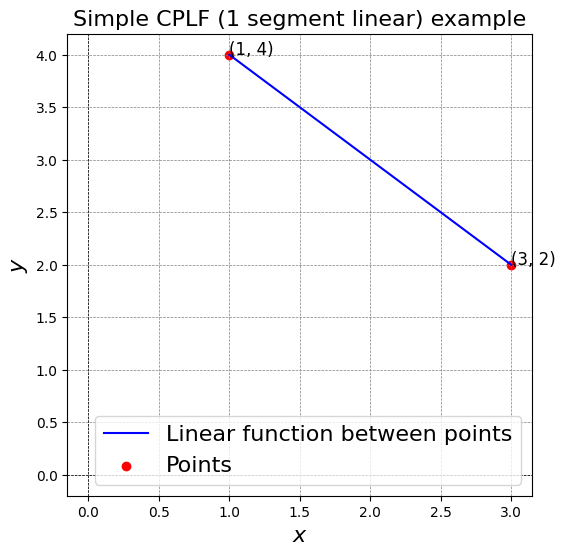

In [2]:
x1, y1 = 1, 4
x2, y2 = 3, 2

plt.figure(figsize=(6, 6))
plt.plot([x1, x2], [y1, y2], 'b-', label="Linear function between points")  
plt.scatter([x1, x2], [y1, y2], color='red', label="Points")    

plt.text(x1, y1, f"({x1}, {y1})", fontsize=12)
plt.text(x2, y2, f"({x2}, {y2})", fontsize=12)

plt.title("Simple CPLF (1 segment linear) example", fontsize=fontsize)
plt.xlabel("$x$", fontsize=fontsize)
plt.ylabel("$y$", fontsize=fontsize)
plt.axhline(0, color='black',linewidth=0.5, linestyle="--")  
plt.axvline(0, color='black',linewidth=0.5, linestyle="--")  
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(loc="best", fontsize=fontsize)
plt.show()

## Linear function

$f(x) = m*x + n$, with m = 1 and n = 1, and with $x \in [1,3]$

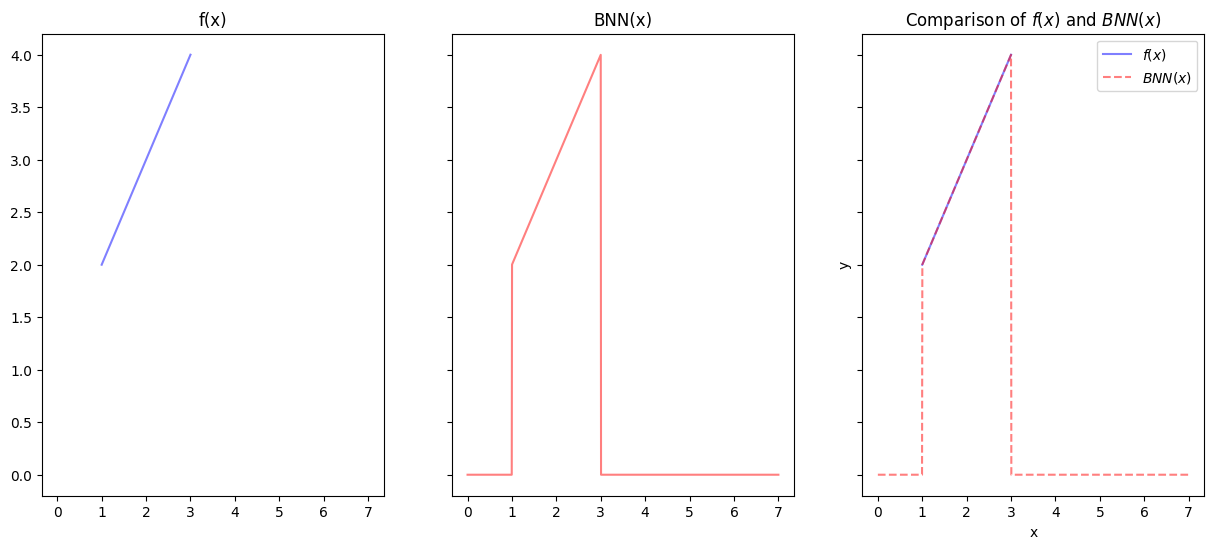

In [3]:
# The points that define the CPLF
points = tf.constant([[1,2],[3,4]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(0, 7, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample1.png', dpi=300, bbox_inches='tight')
plt.show()


## Decreasing linear function

$f(x) = m*x + n$, with m = -1 and n = 5, with $x \in [1,3]$

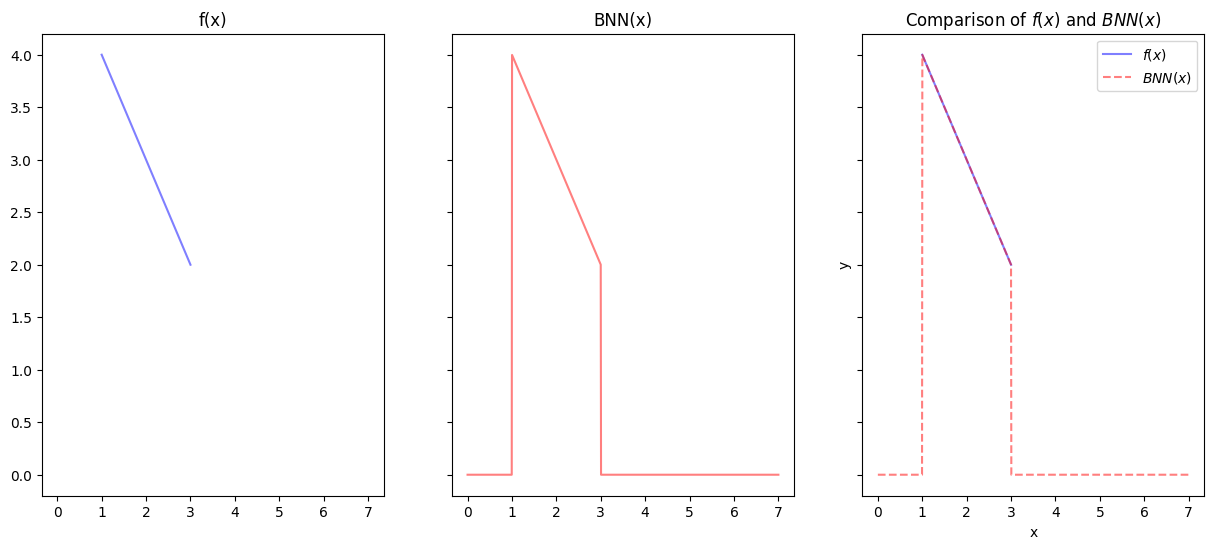

In [4]:
# The points that define the CPLF
points = tf.constant([[1,4],[3,2]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(0, 7, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample2.png', dpi=300, bbox_inches='tight')
plt.show()


### CPLF function formed by two increasing linear functions

$f_1(x) = m_1*x + n_1$, with m = 1 and n = 1, in $x \in [1,3]$

$f_2(x) = m_2*x + n_2$, with m = 2 and n = -2, in $x \in [3,5]$

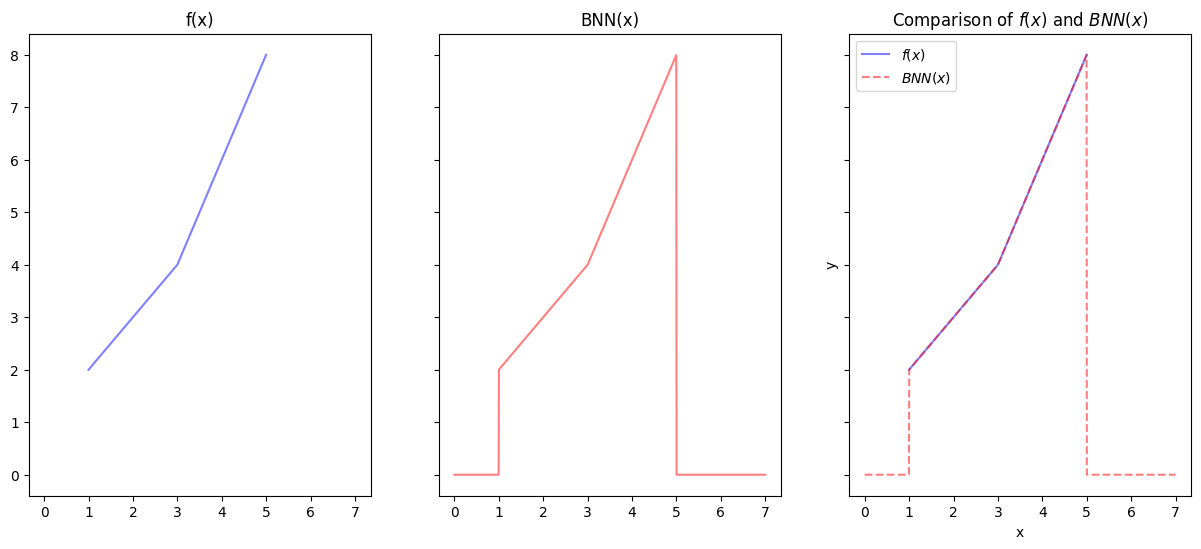

In [5]:
points = tf.constant([[1,2],[3,4],[5,8]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(0, 7, 1000),axis=1)
# We add a joining point as input to test the model on this point too
new_element = tf.constant([[3.]], dtype=tf.float64)
x_values = tf.sort(tf.concat([x_values, new_element], axis=0),axis=0) 
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample3.png', dpi=300, bbox_inches='tight')
plt.show()

### CPLF function formed by a decreasing and an increasing function, in that order.
$f_1(x) = m_1*x + n_1$, with m = -1 and n = 5, in $x [1,3]$

$f_2(x) = m_2*x + n_2$, with m = 2 and n = -4, in $x \in [3,5]$

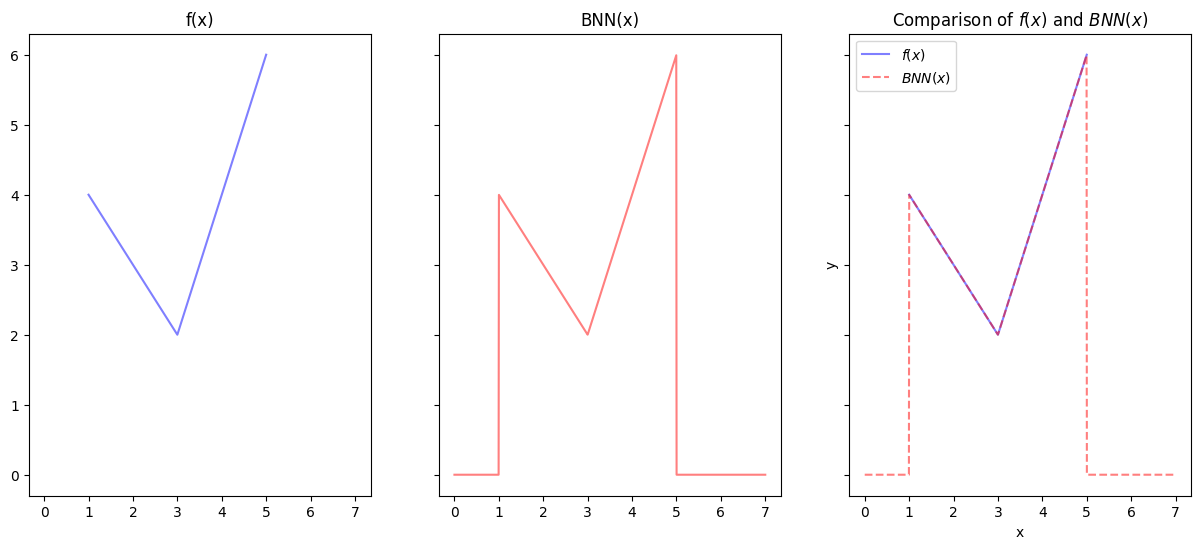

In [6]:
points = tf.constant([[1,4],[3,2],[5,6]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(0, 7, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample4.png', dpi=300, bbox_inches='tight')
plt.show()

## CPLF

If we have a continuous piecewise linear function, we can represent it by tis barycentric neural network:

### Example 1
$
$f(x)$ = \begin{cases} 
    x + 2 & \text{if } x \in [-10,0)\\
    -x + 2 & \text{if } x \in [0, 2)\\
    x - 2 & \text{if } x \in [2,10)
\end{cases}
$

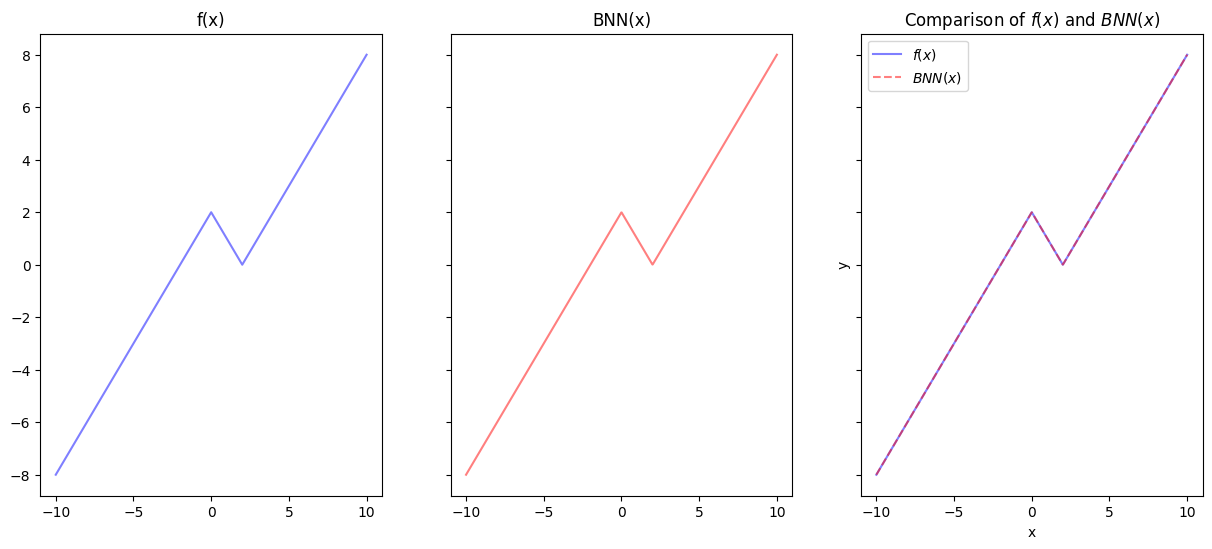

In [8]:
points = tf.constant([[-10,-8],[0,2],[2,0],[10,8]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(-10, 10, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample5.png', dpi=300, bbox_inches='tight')
plt.show()

### Example 2


$f(x)=
\begin{cases} 
    3x + 1 & \text{si } x \in [-10, 0) \\
    -4x + 1 & \text{si } x \in [0, 1) \\
    x - 4 & \text{si } x \in [1, 4) \\
    -0.5x + 2 & \text{si } x \in [4,10) 
\end{cases}
$

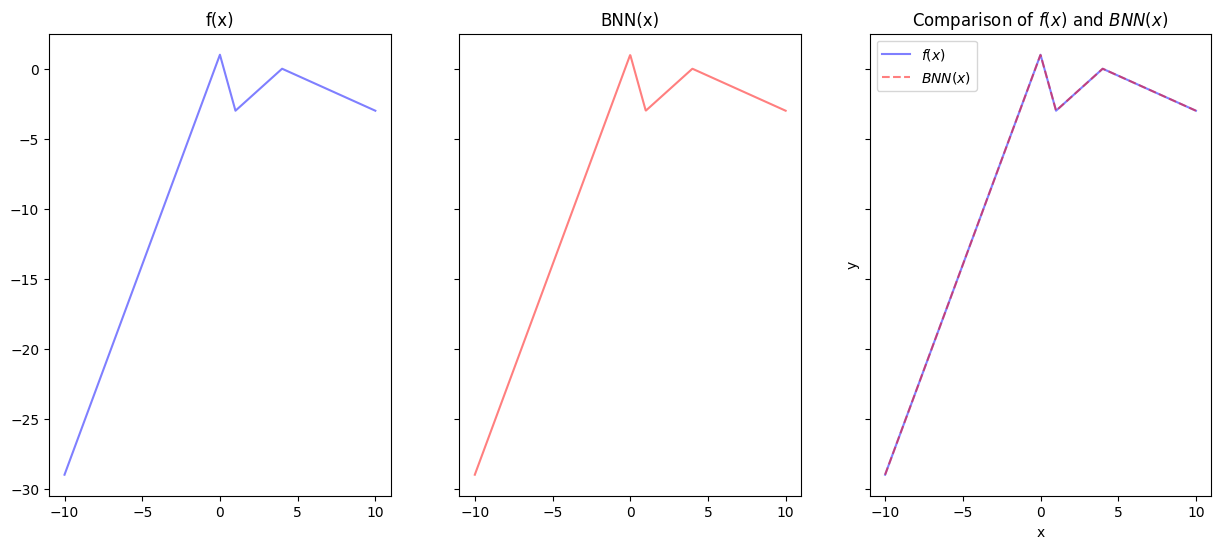

In [9]:
points = tf.constant([[-10,-29],[0,1],[1,-3],[4,0],[10,-3]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(-10, 10, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample6.png', dpi=300, bbox_inches='tight')
plt.show()

## Example 3

Any points directly form a CPLF, it is simpler that way.

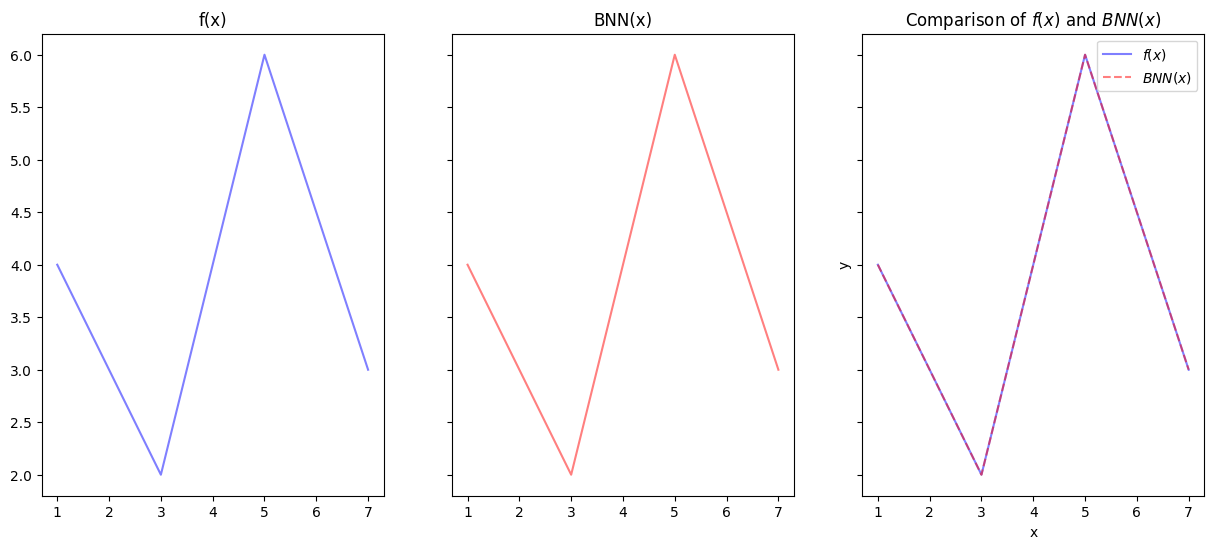

In [10]:
# Definir una lista de puntos [(x1, y1), (x2, y2), ..., (xn, yn)]
points = tf.constant([[1,4],[3,2],[5,6],[7,3]],dtype = tf.float32)

# Initialize the network according to the points that define the CPLF
network = BaricentricNetwork(points)

# Example input to test the model
x_values = tf.expand_dims(tf.linspace(1, 7, 1000),axis=1)  
output = network(x_values)

# nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
# output = tf.where(output != 0, output, nan_tensor)

# Plot the results
fig,axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
axs[0].plot(points[:,0], points[:,1], 'b-', alpha=0.5)
axs[0].set_title("f(x)")
axs[1].plot(x_values, output, 'r-', alpha=0.5)
axs[1].set_title("BNN(x)")
axs[2].plot(points[:,0], points[:,1], 'b-', label="$f(x)$",alpha=0.5)
axs[2].plot(x_values, output, 'r--', label="$BNN(x)$", alpha=0.5)
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title("Comparison of $f(x)$ and $BNN(x)$")
plt.savefig('figures/BNNRepresentationCPLFExample7.png', dpi=300, bbox_inches='tight')
plt.show()